In [3]:
using Symbolics

In [7]:
@variables A = [2 -2 0 1 1; 2 -1 1 -2 1; 0 3 4 -3 1; 0 0 -2 -5 -3; 0 0 0 7 3]

1-element Vector{Num}:
 A

In [8]:
Symbolics.get_variables(A)

1-element Vector{Any}:
 A

In [9]:
Symbolics.tosymbol(A)

:A

In [10]:
@variables x t u(x, t) z(t)[1:2]

4-element Vector{Any}:
       x
       t
 u(x, t)
        (z(t))[1:2]

In [16]:
Dₜ = Differential(t)

(::Differential) (generic function with 3 methods)

In [17]:
Dₓ = Differential(x)

(::Differential) (generic function with 3 methods)

In [18]:
ex = Symbolics.diff2term(Symbolics.value(Dₓ(Dₜ(u))))

uˍtx(x, t)

In [20]:
ex₂ = Symbolics.diff2term(Symbolics.value(Dₜ(z[1])))

var"z(t)[1]ˍt"

In [21]:
using Latexify
latexify(ex₂)

L"\begin{equation}
z(t)[1]ˍt
\end{equation}
"

In [22]:
vars = @variables x₁ x₂;

In [23]:
exprs = [2x₁, 3x₂, 4x₁ * x₂];

In [26]:
Symbolics.jacobian_sparsity(exprs, vars)

3×2 SparseArrays.SparseMatrixCSC{Bool, Int64} with 4 stored entries:
 1  ⋅
 ⋅  1
 1  1

In [33]:
@variables t α σ(..) β[1:2]
@variables w(..) x(t) y z(t, α, x)
expr = β[1]* x + y^α + σ(3) * (z - t) - β[2] * w(t - 1)
substitute(expr, Dict(β[i] => 10*i for i in 1:2))

10x(t) - 20w(-1 + t) + y^α + (-t + z(t, α, x(t)))*σ(3)

# References
- [ ] [18.06 Pset 1 Solutions](https://web.mit.edu/18.06/www/Fall2022/pset1sol.html)

---

In [12]:
using LinearAlgebra
D = diagm(4, 5, 0 => fill(-1, 4), 1 => fill(1, 4))

4×5 Matrix{Int64}:
 -1   1   0   0  0
  0  -1   1   0  0
  0   0  -1   1  0
  0   0   0  -1  1

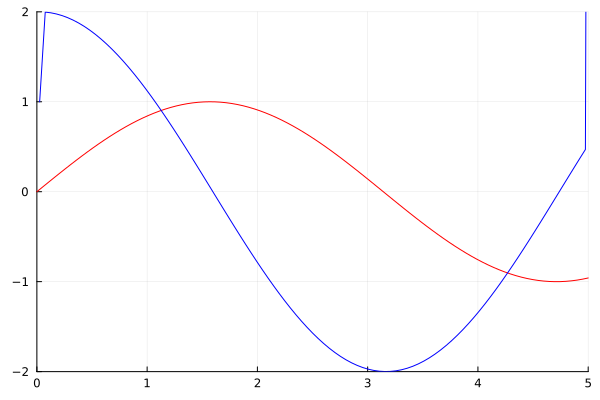

In [14]:
using Plots

a, b = 0, 5
n = 100
Δx = (b - a) / (n - 1)

x = range(a, b, length=n)
f = sin.(x)

# Create the central difference differentiation matrix
D = diagm(-1 => fill(-1/Δx, n-1), 1 => fill(1/Δx, n-1))

# Apply the matrix D to the function f
Df = D * f[1:end]

# Plot the original function and the derivative
plot(x, f, linecolor="red", linestyle=:solid, label="f", legend=:false)
# plot!(x[1:end-1] .+ Δx/2, Df, linecolor="blue", linestyle=:solid, label="D*f")
plot!(x[1:end] .+ Δx/2, Df, linecolor="blue", linestyle=:solid, label="D*f"
    , ylims = (-2,2)
    , xlims = (0, 5)
)

# References
- [ ] [Function Registration and Tracing](https://symbolics.juliasymbolics.org/stable/manual/functions/)